



<h1 style="font-size: 40px; color: #5A5A5A;text-align: center;
"> CAR SALES PREDICTION</h1>



<h1 align='center' style="color:#808080"> Import the Dependencies
</h1>


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("cardata.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.isnull().mean()*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


 
<h1 style="font-size: 30px; color:11040D;text-align: center;
">  EXPLORATARY DATA ANALYSIS</h1>




<h1 style="font-size: 30px; color:#5A5A5A;text-align: center;
"> UNIVARIATE ANALYSIS</h1>




<h1 align='center' > HISTOGRAM
</h1>

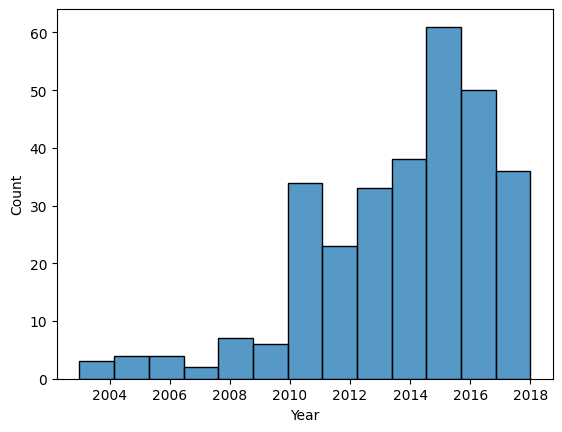

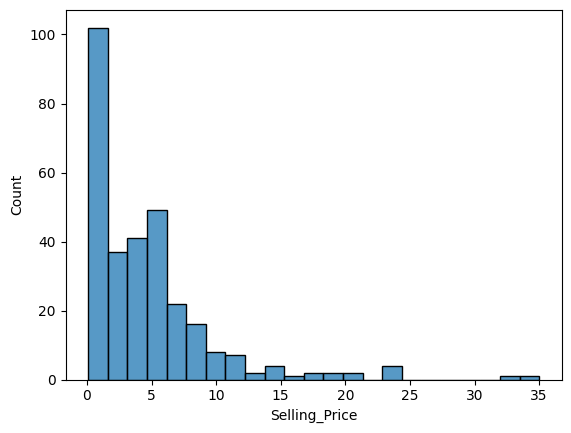

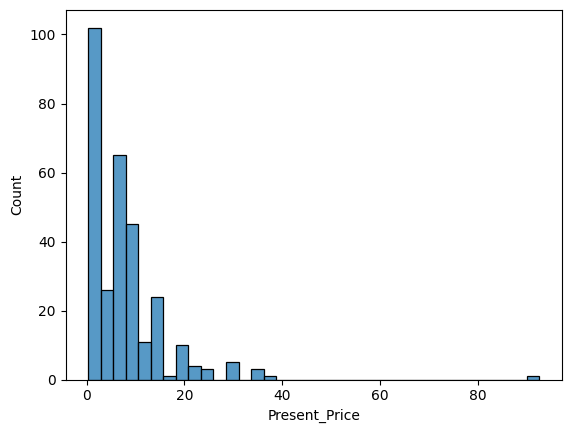

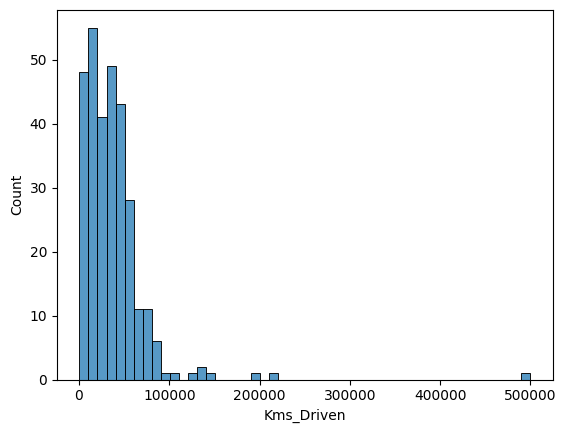

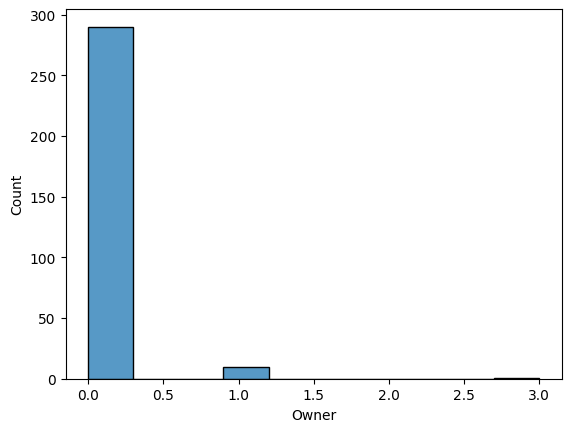

In [7]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.histplot(df[i])
        plt.show()





<h1 align='center' > KDE PLOT
</h1>

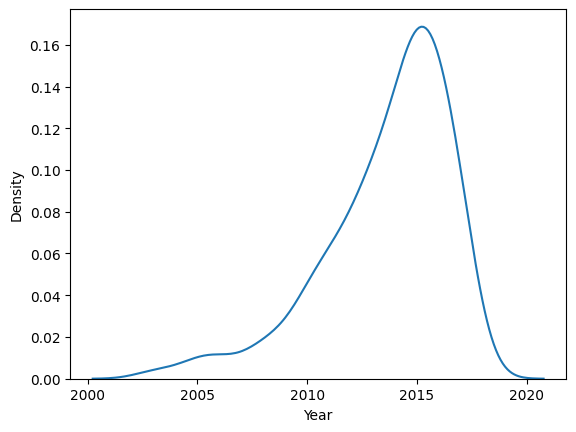

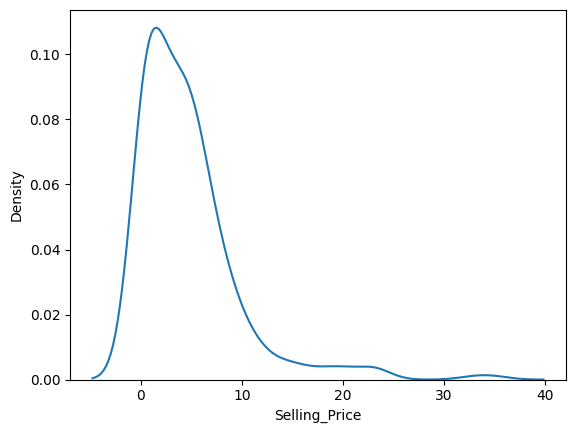

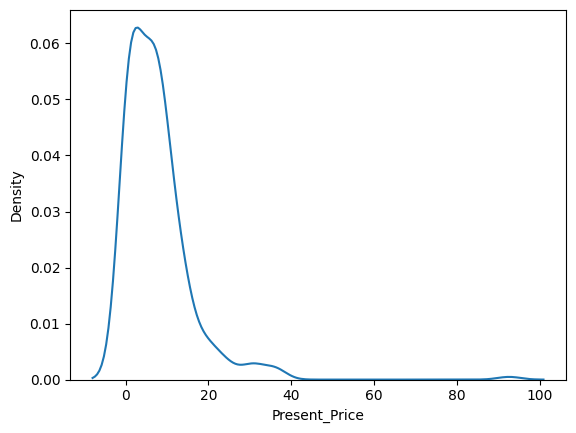

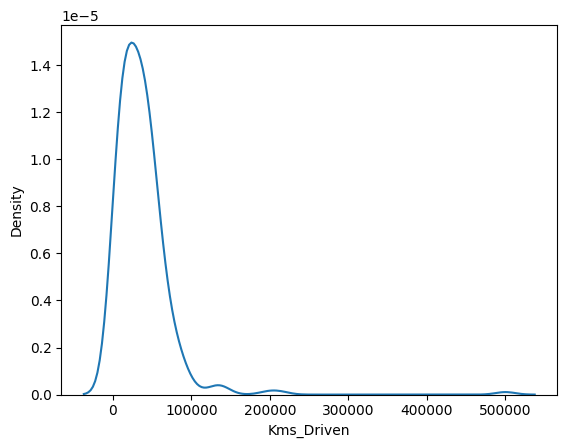

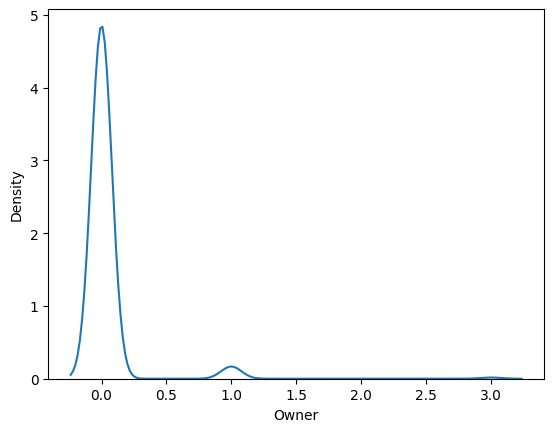

In [8]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.kdeplot(df[i])
        plt.show()







<h1 align='center' > BOXPLOT
</h1>

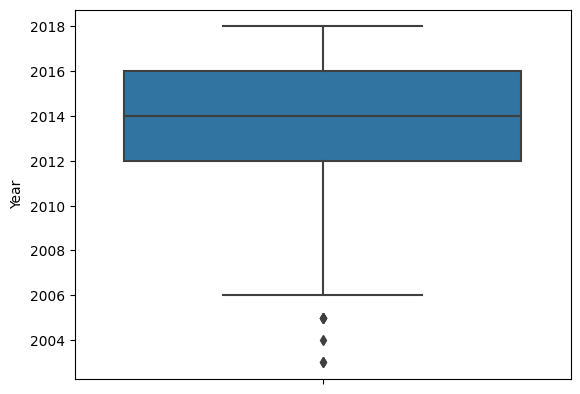

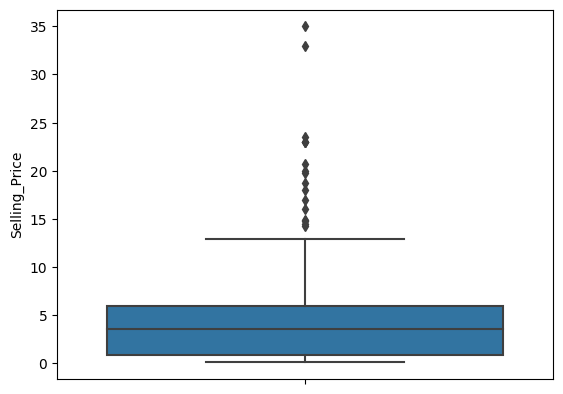

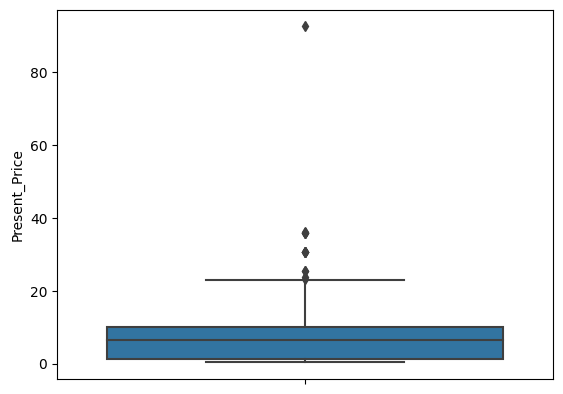

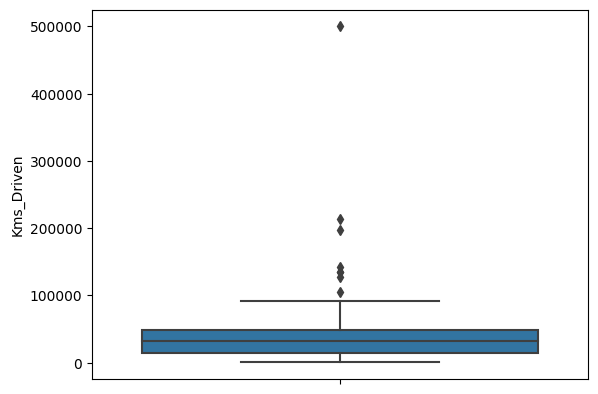

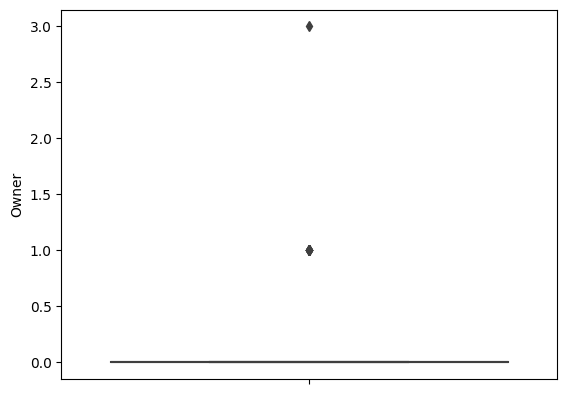

In [9]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()

In [10]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0





<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
"> MULTIVARIATE ANALYSIS</h1>

<h1 align='center' > BARPLOT
</h1>

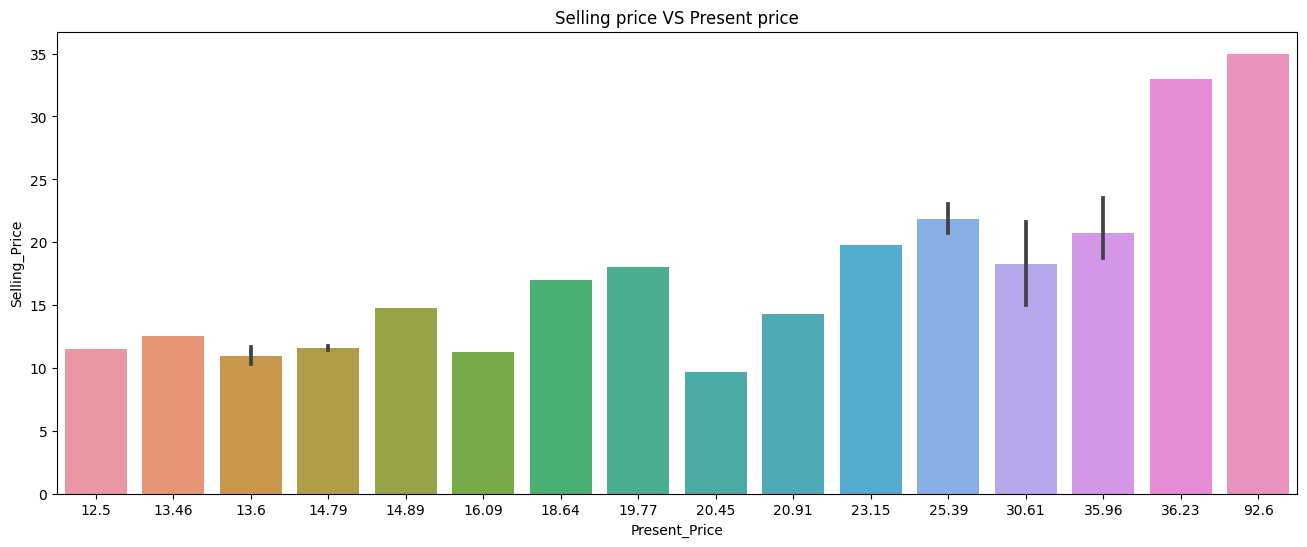

In [11]:

plt.figure(figsize=(16,6))
plt.title("Selling price VS Present price")
sns.barplot(x='Present_Price', y='Selling_Price', data=df.sort_values(by='Selling_Price', ascending=False)[:30]);

<h1 align='center' > PIECHARTS
</h1>

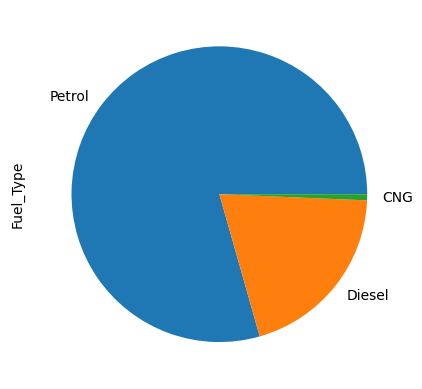

In [12]:
df.Fuel_Type.value_counts().plot.pie();

#Here we slicing fuel types using pie chart

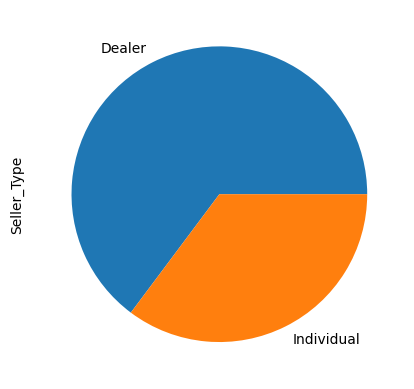

In [13]:
df.Seller_Type.value_counts().plot.pie();

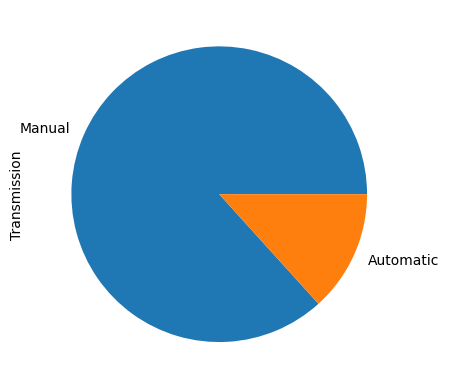

In [14]:
df.Transmission.value_counts().plot.pie();

<h1 align='center' > LINECHART

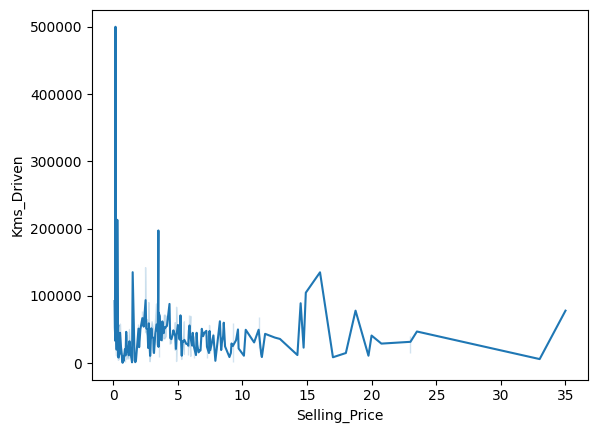

In [15]:
sns.lineplot(x='Selling_Price',y='Kms_Driven', data=df);

<h1 align='center' > BARPLOT

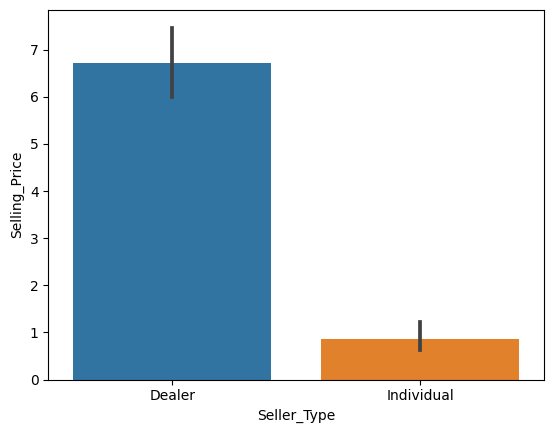

In [16]:
sns.barplot(x= 'Seller_Type', y='Selling_Price', data=df);

<h1 align='center' > SET THE OULIER

In [17]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [18]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
  

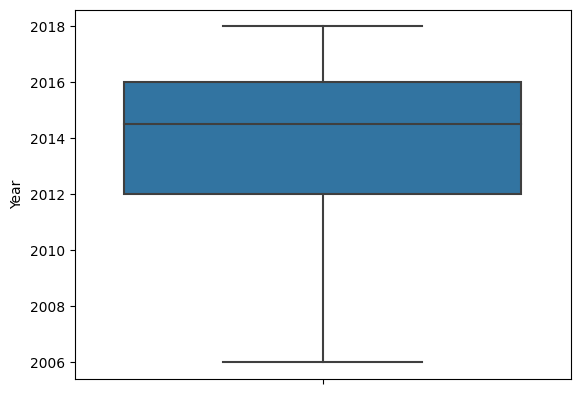

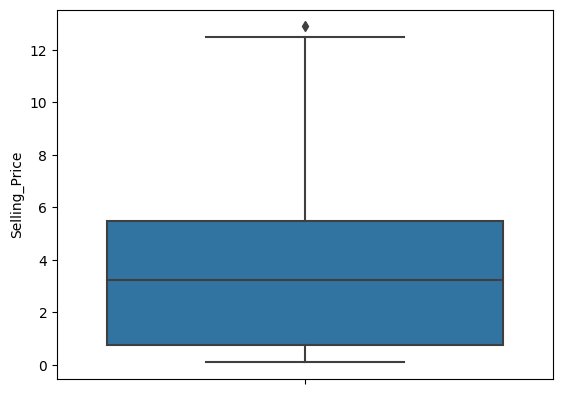

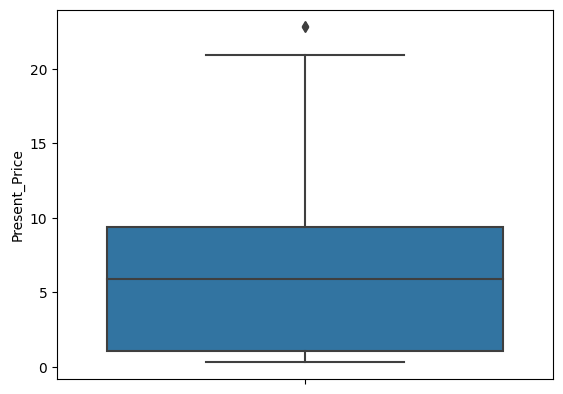

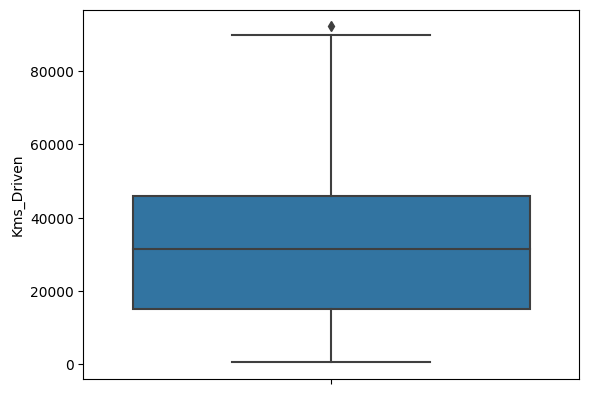

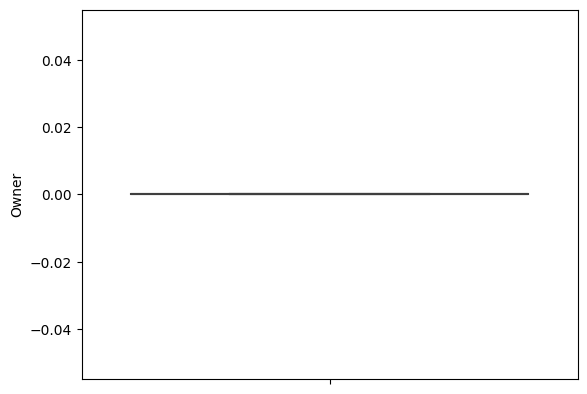

In [19]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [20]:
df.isnull().mean()*100

Car_Name         0.000000
Year             2.325581
Selling_Price    5.647841
Present_Price    4.651163
Kms_Driven       2.657807
Fuel_Type        0.000000
Seller_Type      0.000000
Transmission     0.000000
Owner            3.654485
dtype: float64

In [21]:
df.dropna(inplace=True )



<h2 align='center' > Using Label encoder covert object data type  into numerical values
</h2>

In [22]:
le = LabelEncoder()

In [23]:
df['Car_Name']=le.fit_transform(df['Car_Name'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       264 non-null    int32  
 1   Year           264 non-null    float64
 2   Selling_Price  264 non-null    float64
 3   Present_Price  264 non-null    float64
 4   Kms_Driven     264 non-null    float64
 5   Fuel_Type      264 non-null    int32  
 6   Seller_Type    264 non-null    int32  
 7   Transmission   264 non-null    int32  
 8   Owner          264 non-null    float64
dtypes: float64(5), int32(4)
memory usage: 16.5 KB


In [25]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014.0,3.35,5.59,27000.0,2,0,1,0.0
1,84,2013.0,4.75,9.54,43000.0,1,0,1,0.0
2,61,2017.0,7.25,9.85,6900.0,2,0,1,0.0
3,87,2011.0,2.85,4.15,5200.0,2,0,1,0.0
4,83,2014.0,4.60,6.87,42450.0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...
296,62,2016.0,9.50,11.60,33988.0,1,0,1,0.0
297,60,2015.0,4.00,5.90,60000.0,2,0,1,0.0
298,62,2009.0,3.35,11.00,87934.0,2,0,1,0.0
299,62,2017.0,11.50,12.50,9000.0,1,0,1,0.0


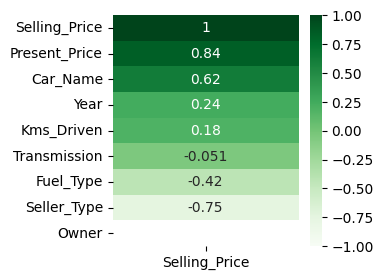

In [26]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr()[['Selling_Price']].sort_values(by="Selling_Price",ascending = False),vmin=-1,vmax=1,annot = True, cmap="Greens")
plt.show()

In [27]:
x=df[["Present_Price","Year","Kms_Driven"]].values

In [28]:
y=df[["Selling_Price"]].values




<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
"> Model Buliding Using Cross Validation</h1

In [29]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [30]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.4540689565290499
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.4540199967668186
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  7.409874902184541
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.914308144214424
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.7413656910717636
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.8314664005228558
********************************************




<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
">  RadomForestRegressor has lowest RMSE value</h1


<h2 align='center' > Feature scaling
</h2>

In [31]:
sc=StandardScaler()

In [32]:
x=sc.fit_transform(x)




<h2 align='center' > Spliting into training and testing
</h2>

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
RF= RandomForestRegressor()

In [35]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
training_score = RF.score(x_train, y_train)
training_score

0.9895212935446704

In [37]:
testing_score=RF.score(x_test,y_test)
testing_score

0.937094023649124

In [38]:
y_pred = RF.predict(x)

In [39]:
output = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
output

,ACTUAL,PREDICTED
0,3.35,3.8010
1,4.75,5.1113
2,7.25,7.6803
3,2.85,2.7275
4,4.60,4.5310
...,...,...
259,9.50,9.2531
260,4.00,4.1435
261,3.35,3.4500
262,11.50,10.4747





<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
">SCATTER PLOT</h1
    

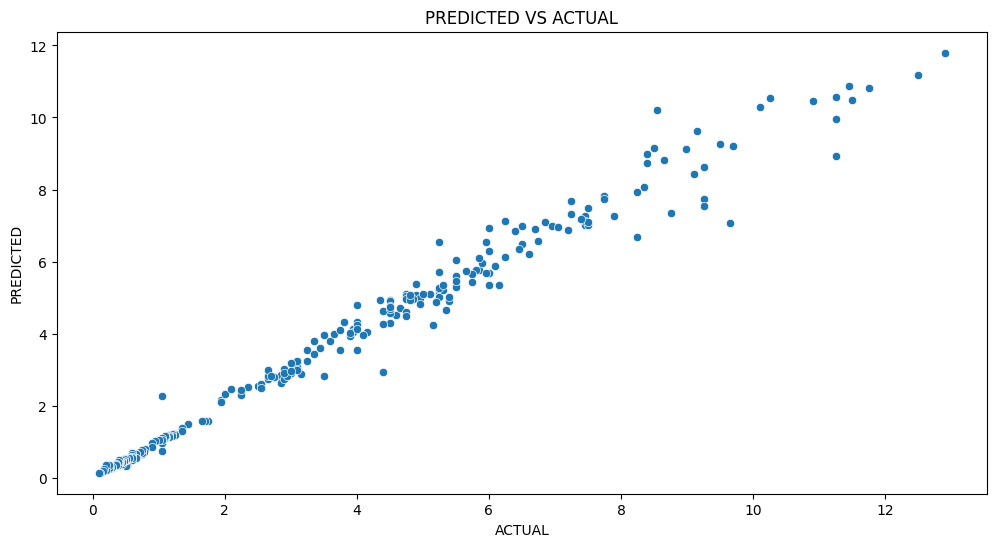

In [40]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=output, x="ACTUAL", y = "PREDICTED");